In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
group1 = np.random.rand(25)
group2 = np.random.rand(20)


# variance1 = np.var(group1, ddof=1)
# variance2 = np.var(group2, ddof=1)

variance1 = np.var(group1)
variance2 = np.var(group2)

In [5]:

# Calculate the F-statistic
f_value = variance1 / variance2

#Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

In [6]:

# Print the results
print("Degree of freedom 1:", df1)
print("Degree of freedom 2:", df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 24
Degree of freedom 2: 19
F-statistic: 1.0955691404303514
p-value: 0.5754973871879141


***F-distribution: when the ratio of two independent chi-square variables is divided by their respective degrees of freedom***

In [7]:
df1 = 7
df2 = 13

s1 = np.random.chisquare(df1, size=1000)
s2 = np.random.chisquare(df2, size=1000)

In [8]:
f_value = (s1/df1)/(s2/df2)

f_value = np.sort(f_value)
pdf = stats.f.pdf(f_value, df1, df2)
cdf = stats.f.cdf(f_value, df1, df2)

p_value = 1 - cdf

<function matplotlib.pyplot.show(close=None, block=None)>

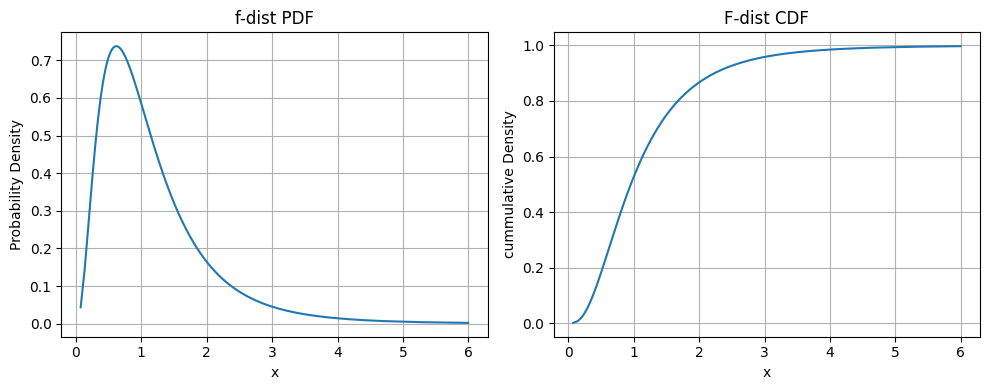

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(f_value, pdf)
plt.title("f-dist PDF")
plt.xlabel('x')
plt.grid(True)
plt.ylabel('Probability Density')

plt.subplot(1,2,2)
plt.plot(f_value, cdf)
plt.title('F-dist CDF')
plt.xlabel('x')
plt.ylabel('cummulative Density')
plt.grid(True)
plt.tight_layout()
plt.show

***F-test to draw hypothesis***

In [13]:
x = np.random.rand(25)

num_groups = 5
group_labels = np.random.randint(0, num_groups, size = len(x))

group_means = []
for i in range(num_groups):
    group_means.append(np.mean(x[group_labels == i]))

overall_mean = np.mean(x)

In [14]:
SSB = np.sum([len(x[group_labels == i ]) * (group_means[i] - overall_mean)**2 for i in range(num_groups)])

df_between = num_groups - 1
df_within = len(x) - num_groups

MSB = SSB/df_between
SSW = 0
for i in range(num_groups):
    group_samples = x[group_labels == i]
    SSW += np.sum((group_samples - group_means[i])**2)

MSW = SSW / df_within
F_value = MSB/MSW

print("degree of freedom between groups", df_between)
print("degree of freedom within groups", df_within)


degree of freedom between groups 4
degree of freedom within groups 20


In [15]:
alpha = 0.005
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

print("f_critical:", f_critical)

if F_value > f_critical:
    print("reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

f_critical: 5.17427991448808
Fail to reject the null hypothesis
